In [33]:
import torch
import matplotlib.pyplot as plt
import random
from torch.utils.data import DataLoader

from pt_loader import *  # Assuming pt_loader is a module in the current directory.

random.seed(42)
torch.manual_seed(0)

filenames = get_files('tile', 'train')
dataset = LayoutDataset(filenames=filenames)
sampler = BufferedRandomSampler(len(dataset))
bs = 64
dataloader = DataLoader(dataset, batch_size=bs, shuffle=False, collate_fn=custom_collate_fn, sampler=sampler)

# Step 1: Initialize accumulators
config_feat_sums = []
config_feat_sq_sums = []
node_feat_sums = []
node_feat_sq_sums = []
config_runtime_sums = []
config_runtime_sq_sums = []

# Step 2: Iterate over the entire dataset
for config_feat, node_feat, config_runtime, _, _ in dataloader:

    # og_node_feat = torch.clone(node_feat)
    # node_feat = torch.log(node_feat + 1e-7)


    mask = node_feat >= 0
    node_feat  = torch.sqrt(node_feat * mask)

    
    if torch.isnan(config_feat).any() or torch.isinf(config_feat).any():
        print("config_feat contains NaN or Inf.")
        continue
    if torch.isnan(node_feat).any() or torch.isinf(node_feat).any():
        raise ValueError("node_feat contains NaN or Inf.", node_feat, og_node_feat)
    if torch.isnan(config_runtime).any() or torch.isinf(config_runtime).any():
        print("config_runtime contains NaN or Inf.")
        continue


    config_feat_sums.append(config_feat.sum() / config_feat.numel())
    config_feat_sq_sums.append((config_feat ** 2).sum() / config_feat.numel())
    node_feat_sums.append(node_feat.sum() / node_feat.numel())
    node_feat_sq_sums.append((node_feat ** 2).sum() / node_feat.numel())
    config_runtime_sums.append(config_runtime.sum() / config_runtime.numel())
    config_runtime_sq_sums.append((config_runtime ** 2).sum() / config_runtime.numel())

In [34]:
config_feat_mean = torch.tensor(config_feat_sums).mean()
config_feat_std = (torch.tensor(config_feat_sq_sums).mean() - config_feat_mean ** 2) ** 0.5

node_feat_mean = torch.tensor(node_feat_sums).mean()
node_feat_std = (torch.tensor(node_feat_sq_sums).mean() - node_feat_mean ** 2) ** 0.5

config_runtime_mean = torch.tensor(config_runtime_sums).mean()
config_runtime_std = (torch.tensor(config_runtime_sq_sums).mean() - config_runtime_mean ** 2) ** 0.5

# Print the results
print(f'Config Features Mean: {config_feat_mean}, Standard Deviation: {config_feat_std}')
print(f'Node Features Mean: {node_feat_mean}, Standard Deviation: {node_feat_std}')
print(f'Config Runtime Mean: {config_runtime_mean}, Standard Deviation: {config_runtime_std}')

Config Features Mean: 16.741966247558594, Standard Deviation: 74.34544372558594
Node Features Mean: 14.231035232543945, Standard Deviation: 305.2548828125
Config Runtime Mean: 4.980834250716549, Standard Deviation: 8.203627220003426


(array([1091., 2620., 5915., 3789., 1969.,  704.,  119.,   52.,   22.,
          12.]),
 array([ 2.50195312,  7.68509102, 12.86822891, 18.05136681, 23.2345047 ,
        28.41764259, 33.60078049, 38.78392029, 43.96705627, 49.15019226,
        54.33333206]),
 <BarContainer object of 10 artists>)

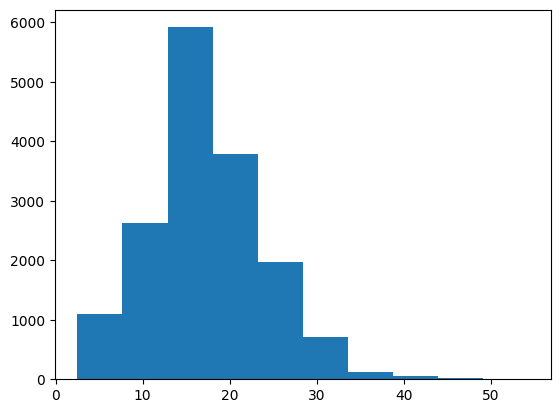

In [30]:
plt.hist(config_feat_sums)

(array([1.1636e+04, 3.8680e+03, 6.1800e+02, 4.3000e+01, 3.4000e+01,
        5.7000e+01, 2.3000e+01, 9.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.94612254,  5.80920363, 10.67228471, 15.53536579, 20.39844687,
        25.26152795, 30.12460904, 34.98769012, 39.8507712 , 44.71385228,
        49.57693336]),
 <BarContainer object of 10 artists>)

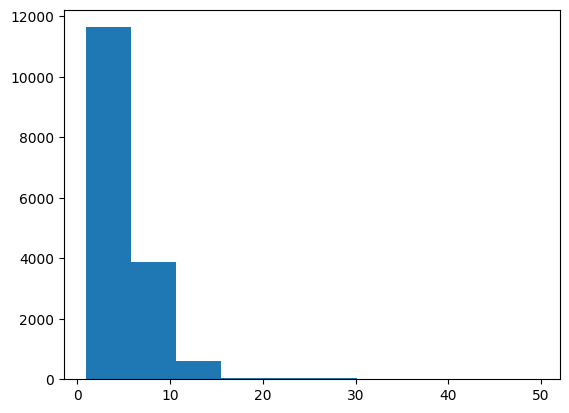

In [31]:
plt.hist(config_runtime_sums)

(array([1737., 5324., 4382., 2343., 1209.,  454.,  507.,   69.,  112.,
         156.]),
 array([ 0.71387446,  7.81761503, 14.9213562 , 22.02509689, 29.12883759,
        36.23257828, 43.33631897, 50.44005966, 57.54380035, 64.64753723,
        71.75128174]),
 <BarContainer object of 10 artists>)

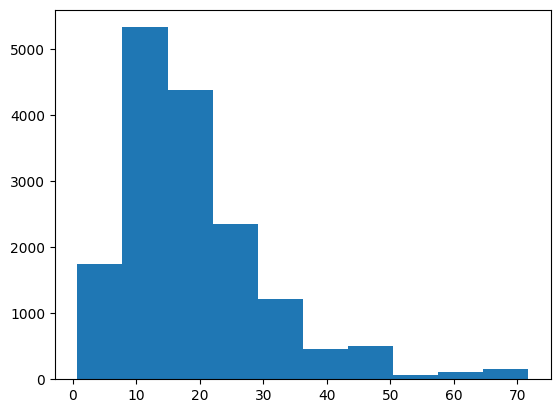

In [32]:
plt.hist(node_feat_sums)